# **CIBA - PYTHON AVANZADO**

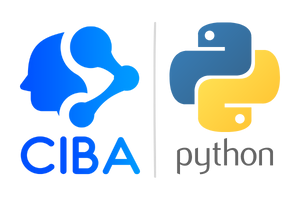


# Introducción a la estadística inferencial

## Introducción a la probabilidad

* Probabilidad básica
* Probabilidad condicional
* Distribución de probabilidad simple
* Función de Masa de Probabilidad y Función de Densidad de Probabilidad
* Distribución Normal
* Distribución normal y desviación típica
* Concepto de Z-score

## Introducción a la inferencia

* Media muestral y media poblacional
* Inferencia estadística
* Teorema del límite central
* Intervalos de confianza
* Interpretación del intervalo de confianza
* Pruebas de hipótesis
* ¿Por qué hipótesis nula?
* Hipótesis alternativa
* Valor P
* Prueba t
* Error tipo I y tipo II
* Prueba de bondad de ajuste Chi-cuadrado
* Prueba de independencia Chi-cuadrado

In [ ]:
# Librerias
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# para evitar advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# leer datos
data = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Statistics-for-Data-Science/master/Datasets/train.csv')

# comprobemos la forma del conjunto de datos
data.shape

(1460, 81)

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# comprobemos la cabecera del conjunto de datos
pd.options.display.max_rows = 82
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 KB 10.1 MB/s eta 0:00:00


Target looks like regression
Showing only top 10 of 44 categorical features


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='SalePrice', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=8.09E-01'}, xlabel='OverallQual (jittered)', ylabel='SalePrice'>,
         <AxesSubplot:title={'center':'F=7.30E-01'}, xlabel='GrLivArea'>,
         <AxesSubplot:title={'center':'F=6.53E-01'}, xlabel='YearBuilt'>,
         <AxesSubplot:title={'center':'F=6.48E-01'}, xlabel='GarageArea'>,
         <AxesSubplot:title={'center':'F=6.01E-01'}, xlabel='TotalBsmtSF'>],
        [<AxesSubplot:title={'center':'F=5.94E-01'}, xlabel='GarageYrBlt', ylabel='SalePrice'>,
         <AxesSubplot:title={'center':'F=5.74E-01'}, xlabel='1stFlrSF'>,
         <AxesSubplot:title={'center':'F=5.72E-01'}, xlabel='YearRemodAdd'>,
         <AxesSubplot:title={'center':'F=5.31E-01'}, xlabel='TotRmsAbvGrd (jittered)'>,
         <AxesSubplot:title={'center':'F=4.77E-01'}, xlabel='OpenPorchSF'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.22E-01'}, xlabel='Sal

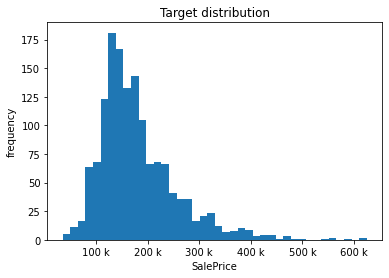

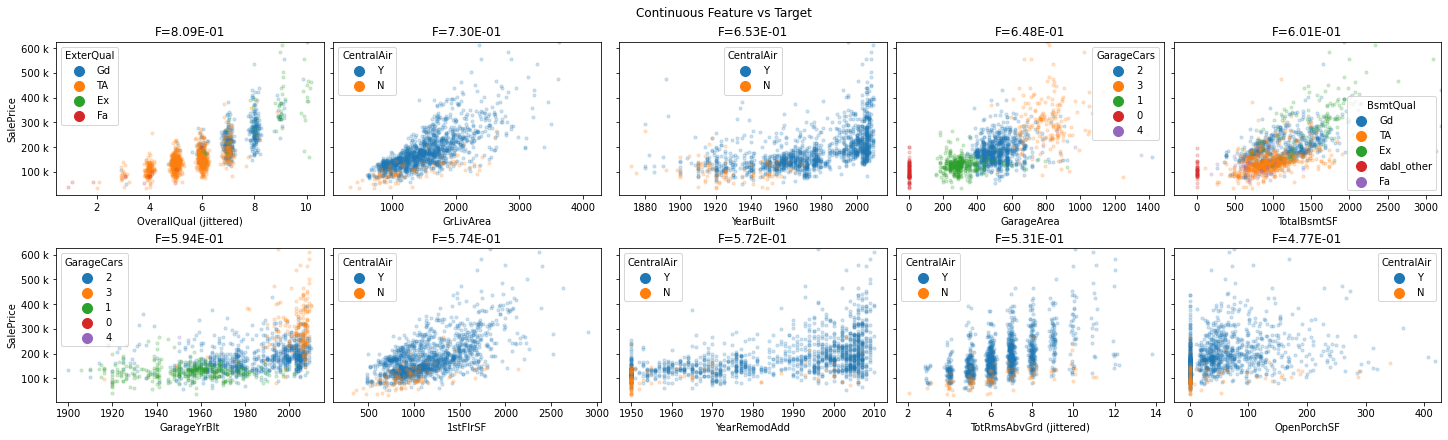

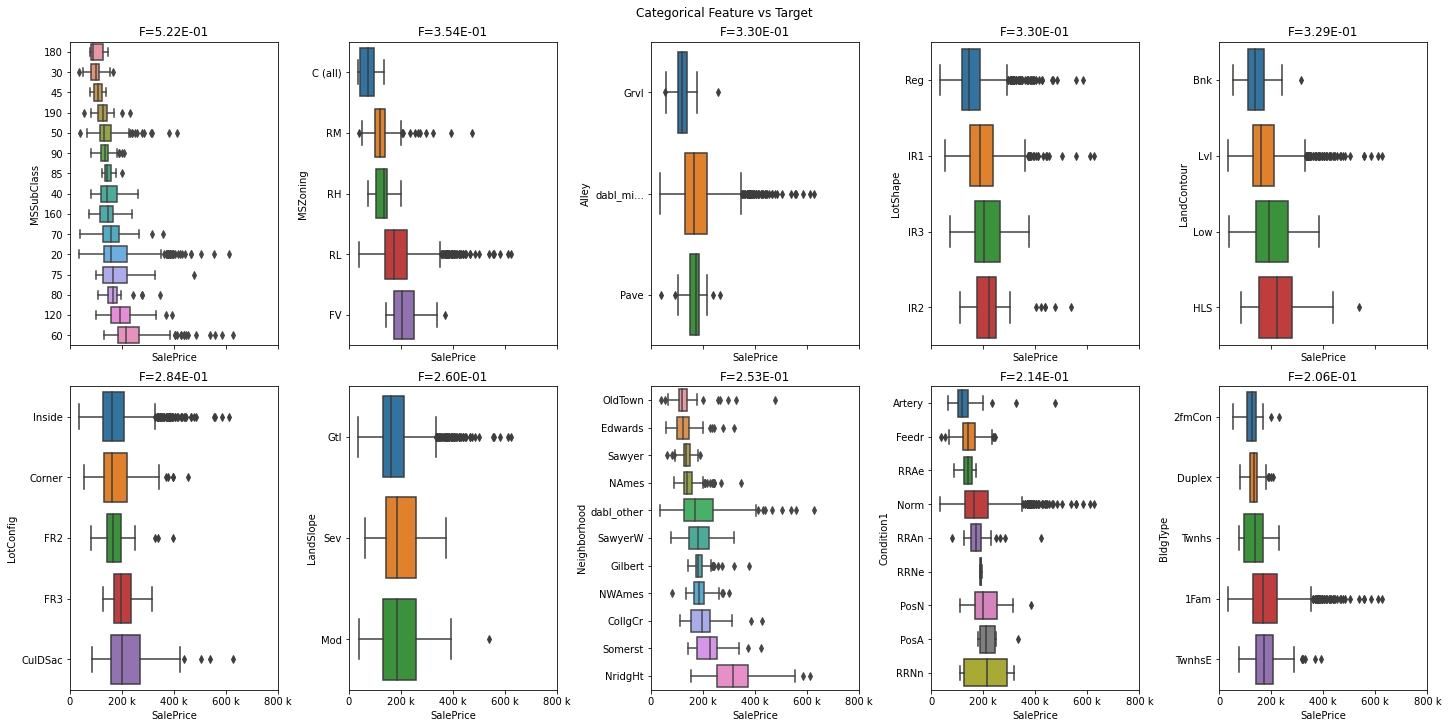

In [ ]:
# Mostrar algunas de las principales variables categoricas

import dabl
dabl.plot(data, target_col = 'SalePrice')

## Probabilidad básica

## Empecemos con un ejemplo sencillo: Digamos que lanzamos una moneda

* Intuitivamente, hay un 50% de probabilidades de obtener cara, y un 50% de probabilidades de obtener cruz. Esto se debe a que sólo hay dos resultados posibles, y cada evento es igualmente probable.

* Por lo tanto, podemos decir que la Probabilidad de obtener Cara es 0,5. Del mismo modo, la probabilidad de obtener cruz es 0,5.

* La probabilidad puede describirse como **la posibilidad de que ocurra un suceso o una secuencia de sucesos**.

* **Experimento** - son las situaciones inciertas, que pueden tener múltiples resultados. El lanzamiento de una moneda es un experimento.
* **Resultado** es el resultado de un único ensayo. Por lo tanto, si sale cara, el resultado de un experimento es "Cara".
* **Evento** es uno o más resultados de un experimento. "Cruz" es uno de los posibles resultados de este experimento.

### Reglas

* La Probabilidad de que un suceso ocurra con seguridad es 1
* La Probabilidad de que un suceso no ocurra con seguridad es 0
* La probabilidad del complemento de un suceso es 1 menos la probabilidad de ese suceso.

* La probabilidad de que ocurra al menos 1 de 2 (o más) cosas que no pueden ocurrir simultáneamente (mutuamente excluyentes) es la suma de sus respectivas probabilidades.

**La exclusión mutua es un término estadístico que describe dos o más sucesos que no pueden ocurrir simultáneamente. Por ejemplo, es imposible sacar un cinco y un tres en un mismo dado al mismo tiempo.**

Para 2 sucesos cualesquiera A y B, la probabilidad de que ocurra al menos uno es la suma de sus probabilidades individuales menos la probabilidad de su intersección. i.e


$$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$

Ejemplo

La Fundación Nacional del Sueño informa de que alrededor del 3% de la población estadounidense tiene problemas de respiración durante el sueño. También informa de que alrededor del 10% de la población estadounidense padece el síndrome de las piernas inquietas. ¿Implica esto que el 13% de las personas tendrá al menos uno de estos problemas?

Respuesta: No, pueden darse simultáneamente y, por tanto, no son mutuamente excluyentes. Para explicarlo mejor:

* **Veamos la Probabilidad de elegir una casa en el Barrio - "OldTown "**


Nº de casas en OldTown/Nº total de casas
Veámoslo en Python

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# vamos a comprobar los diferentes barrios
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
# número total de casas en el barrio
all_houses = data.shape[0]
print("Número total de casas en el barrio :", all_houses)

Número total de casas en el barrio : 1460


In [ ]:
# número total de casas en el barrio del casco antiguo
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print(" Número total de viviendas en la carretera del casco antiguo :", houses_in_OldTown)


 Número total de viviendas en la carretera del casco antiguo : 113


In [ ]:
# vamos a encontrar la probabilidad de elegir una casa en el casco antiguo
probability = (houses_in_OldTown/all_houses)*100
print('Probabilidad de elegir una casa en OldTown: {0:.2f}'.format(probability )+'%')

Probabilidad de elegir una casa en OldTown: 7.74%


## Probabilidad Condicional

* Hay 10 caramelos en una bolsa: 5 verdes y 5 azules.

* ¿Cuál es la probabilidad de obtener 3 caramelos azules seguidos?

* La probabilidad de obtener el primer caramelo azul es 5/10, o 1/2.

Sin embargo, cuando cogemos un caramelo azul, lo sacamos de la bolsa. Nos quedan 9 caramelos en total con (5-1 =)4 azules.
Así que la probabilidad de coger otro azul es de 4/9.
Del mismo modo, la probabilidad de coger un tercer caramelo azul es de 3/8

Como estamos calculando la probabilidad de coger 1 caramelo azul Y 1 caramelo azul Y 1 caramelo azul

* Nuestra probabilidad final es **1/2 * 4/9 * 3/8, or .0833**. Por lo tanto, hay un 8,3% de posibilidades de coger tres caramelos azules seguidos.
Trucos sencillos: Siempre que tenga que decir verbalmente Y (como acabamos de hacer arriba), querrá MULTIPLICAR las probabilidades.
Siempre que tengas que decir verbalmente O, querrás SUMAR las probabilidades.

**DADO que tenemos la probabilidad de elegir una casa en el barrio "OldTown", vamos un paso más allá y VUELVEMOS a elegir una casa del MISMO barrio...**.

In [ ]:
## Introduzca el código de probabilidad condicional
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) 
print("La probabilidad de elegir una casa en el casco antiguo y volver a elegir una casa del mismo barrio es de {0:.9f}".
      format(cond_prob*100))

La probabilidad de elegir una casa en el casco antiguo y volver a elegir una casa del mismo barrio es de 0.594139352


## Distribución de probabilidad simple

* Tomemos un ejemplo, tiramos un dado de seis caras.
* por lo tanto, hay Total no. de Combinaciones = 6 * 6 = 36

Veamos cómo:

2 {(1,1)} => 1/36

3 {(1,2),(2,1)} => 2/36

4 {(2,2),(3,1),(1,3)} => 3/36

5 {(1,4),(4,1),(2,3),(3,2)} => 4/36

6 {(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7 {(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8 {(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9 {(3,6),(6,3),(5,4),(4,5)} => 4/36

10 {(4,6),(6,4),(5,5)} => 3/36

11 {(5,6),(6,5)} => 2/36

12 {(6,6)} = > 1/36

## PDF y PMF

* La distribución de probabilidad para una variable aleatoria discreta es la **función de masa de probabilidad** para esa variable y de forma similar y si nuestra variable aleatoria toma valores continuos la distribución se llama **función de densidad de probabilidad**.

* En lo anterior lo que graficamos fue la Función de Masa de Probabilidad de una Variable Aleatoria Discreta (X que es la suma de dos dados justos)

* Una de las Funciones de Distribución de Probabilidad más comunes es la Distribución Normal.


## Distribución Normal

* La distribución normal, también conocida como distribución de Gauss, es una distribución de probabilidad simétrica respecto a la media, que muestra que los datos cercanos a la media son más frecuentes que los datos alejados de la media. En forma de gráfico, la distribución normal aparece como una curva de campana.

### Comprobación de la asimetría de los datos

* Generalmente comprobamos la Asimetría en las Columnas Objetivo de los datos.
* La asimetría es un estado de distribución en el que la distribución está muy sesgada hacia el lado derecho o izquierdo del gráfico.

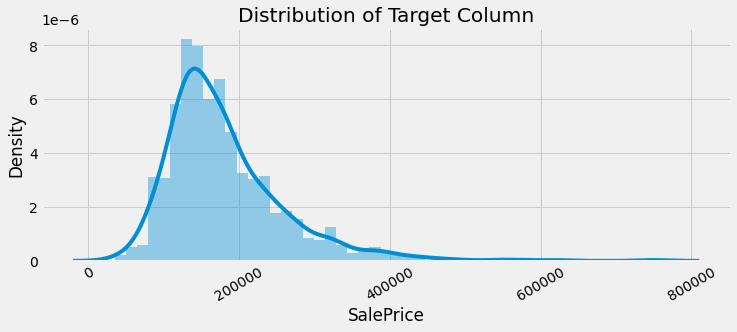

In [51]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

* La distribución de nuestra variable objetivo, Precio de venta, no se parece a una distribución normal, está sesgada a la derecha.
* Si eliminamos los valores atípicos, se parecería a una distribución normal.

## Z-Score

* El número de desviaciones estándar de la media también se denomina "puntuación estándar", "sigma" o "puntuación z".
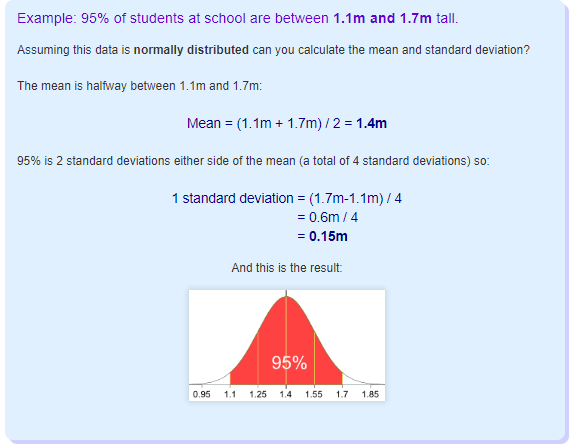
* Pongamos un ejemplo para entender mejor el significado de la puntuación z
    * Supongamos que la altura media de un alumno de una clase es de 1,4 metros.
    * En esa misma clase uno de los alumnos mide 1,85 metros
    * Puedes ver en la curva de campana que 1,85m está a 3 desviaciones estándar de la media de 1,4.
    * Por lo tanto, el estudiante con 1,85m de altura tiene un **z-score" de 3,0**.

## Inference

### Media de la muestra y media de la población

* Consideremos una muestra de 500 casas al azar de 1460 casas y tracemos su media
* Pero la media de estas 500 casas puede estar cerca o muy lejos de la media de las 1460 casas calculada anteriormente.

In [52]:
# vamos a tomar la semilla para que cada vez que los valores aleatorios salen a ser constante
np.random.seed(6)

# tomemos 500 valores de muestra del conjunto de datos de 1460 valores
sample_ages = np.random.choice(a= data['SalePrice'], size=500)

# obtener la media muestral
print ("Media de la muestra:", sample_ages.mean() )          

# obtener la media de la población
print("Media de población:", data['SalePrice'].mean())

Media de la muestra: 177499.802
Media de población: 180921.19589041095


## Inferencia Estadística

* Este **subconjunto** de la población no es más que la Muestra de datos

* Llevamos a cabo varias pruebas en la muestra para obtener información sobre la población más amplia.

* Por lo tanto, la inferencia estadística es el proceso de analizar los datos de la muestra para conocer mejor la población de la que se han obtenido los datos e investigar las diferencias entre las distintas muestras de datos.

La media muestral no suele coincidir exactamente con la media poblacional. Esta diferencia puede deberse a muchos factores, como un mal diseño de la encuesta, métodos de muestreo sesgados y la aleatoriedad inherente a la extracción de una muestra de una población.

## Teorema del límite central

El teorema del límite central (CLT) es una teoría estadística que establece que, dado un tamaño de muestra suficientemente grande de una población con un nivel finito de varianza, la media de todas las muestras de la misma población será aproximadamente igual a la media de la población. Además, todas las muestras seguirán un patrón de distribución aproximadamente normal, siendo todas las varianzas aproximadamente iguales a la varianza de la población dividida por el tamaño de cada muestra.

In [ ]:
# Comprobemos el teorema del límite central para estos datos

# permite definir funciones con argumentos parciales
from functools import partial

# número de muestras para promediar.
n=np.array([1, 2, 3, 5, 10, 100, 200])

# número de veces que se toman muestras de tamaño n. Prueba a variar este número.
N = 1000

# número de límites de las parcelas
nobb=101

# media de la distribución exponencial
exp_mean=3

# parámetros de la distribución beta
a,b=0.7,0.5 

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

# permite definir los nombres de los títulos.
title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

# rangos de las tres distribuciones
drange=np.array([[0,1],[0,10],[0,1]]) 

# medias de las tres distribuciones
means=np.array([0.5,exp_mean,a/(a+b)])

# varianzas de las tres distribuciones
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) 

# genera muestras aleatorias en los rangos especificados para las respectivas distribuciones.
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

 # bucle sobre el número de n muestras a promediar
for i in range(ln):
     # bucle sobre las diferentes distribuciones
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()
plt.show()

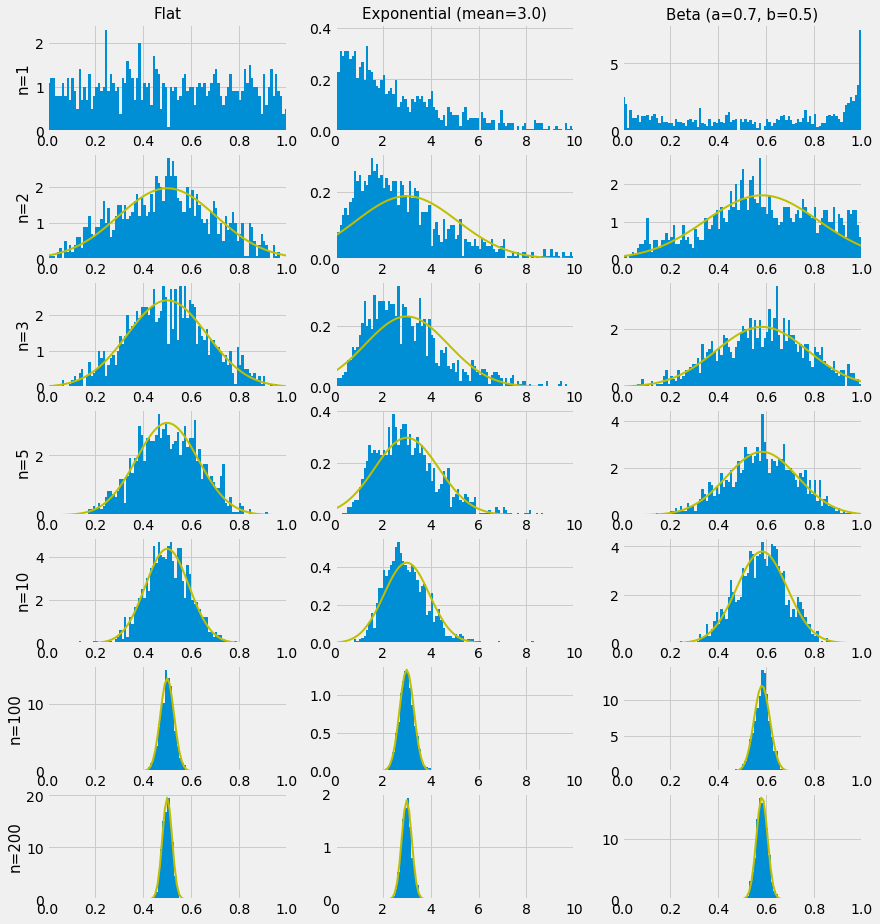


En los gráficos anteriores, la curva amarilla es la distribución gaussiana predicha a partir de la teoría del límite central. Observe que la velocidad de convergencia de la media muestral a la gaussiana depende de la distribución original. Además, la media de la distribución gaussiana es la misma que la de la distribución original,
la anchura de la distribución gaussiana varía con el tamaño de la muestra como $1/\sqrt{n}$.

## Intervalo de confianza

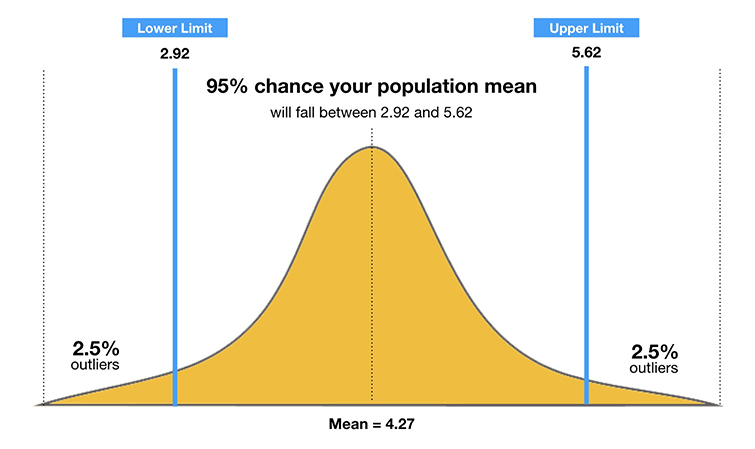


**El intervalo de confianza (IC)** es un tipo de estimación calculada a partir de los estadísticos de los datos observados. Propone un intervalo de valores plausibles para un parámetro desconocido (por ejemplo, la media). El intervalo tiene asociado un nivel de confianza en que el parámetro verdadero se encuentra en el intervalo propuesto.


El intervalo de confianza del 95% define un rango de valores del que se puede estar seguro en un 95% que contiene la media de la población. Con muestras grandes, se conoce la media con mucha más precisión que con una muestra pequeña, por lo que el intervalo de confianza es bastante estrecho cuando se calcula a partir de una muestra grande.

In [50]:
# vamos a importar el paquete scipy
import scipy.stats as stats
import math

# sembremos los valores aleatorios
np.random.seed(10)

# tomemos una muestra
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Obtener el valor crítico z*
z_critical = stats.norm.ppf(q = 0.95)  

 # Comprobar el valor crítico z   
print("z-critical value: ",z_critical)                                

# Obtener la desviación típica de la población
pop_stdev = data['SalePrice'].std()  

# comprobación del margen de error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# definir nuestro intervalo de confianza
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# imprimamos los resultados
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Observa que la media real está contenida en nuestro intervalo.
* Un intervalo de confianza del 95% significaría que si tomamos muchas muestras y creamos intervalos de confianza para cada una de ellas, el 95% de los intervalos de confianza de nuestras muestras contendrán la verdadera media poblacional.
* Ahora, vamos a crear varios intervalos de confianza y representarlos gráficamente para tener una mejor idea de lo que significa "capturar" la verdadera media.

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Obtener el valor crítico z* 
    z_critical = stats.norm.ppf(q = 0.975)         

    # Obtener la desviación típica de la población
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()

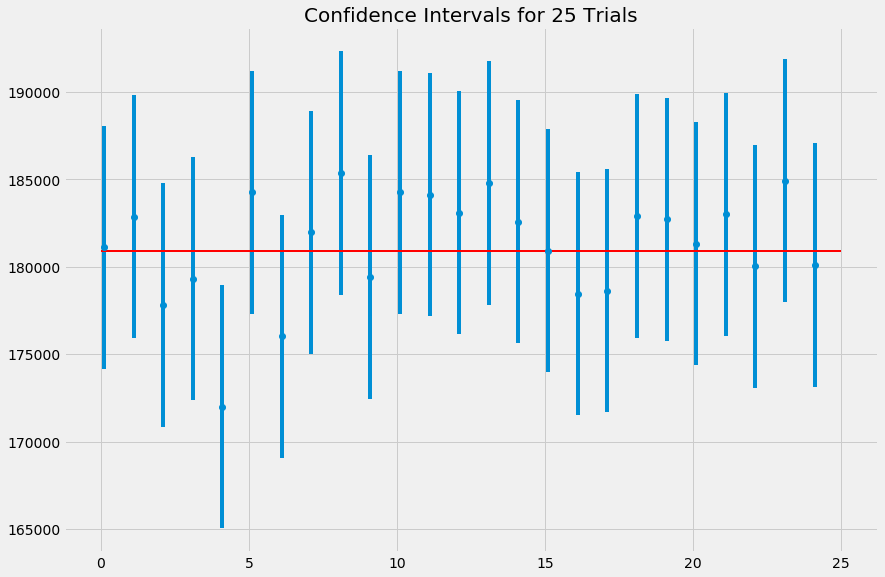

* Es fácilmente visible que el 95% de las veces la línea azul (la media muestral) se solapa con la línea roja (la media real), también el 5% de las veces se espera que no se solape con la línea roja (la media real).

## Prueba de hipótesis

* $Hipótesis estadística$, a veces denominada análisis confirmatorio de datos, es una hipótesis comprobable a partir de la observación de un proceso que se modela mediante un conjunto de variables aleatorias. Una prueba de hipótesis estadística es un método de inferencia estadística.

### Hipótesis nula

* En Estadística Inferencial, **La Hipótesis Nula es una afirmación general o posición por defecto de que no existe relación entre dos fenómenos medidos o no hay asociación entre grupos**.

* Las pruebas estadísticas de hipótesis se basan en una afirmación llamada hipótesis nula que asume que no ocurre nada interesante entre las variables que se están probando.

* Por lo tanto, en nuestro caso la Hipótesis Nula sería:
**La Media de los Precios de las Casas en OldTown no es diferente de las casas de otros barrios**

### Hipótesis alternativa

* La hipótesis alternativa es sólo una alternativa a la nula. Por ejemplo, si su nula es **Voy a ganar hasta 1000** entonces su alternativa es **Voy a ganar más de 1000.** Básicamente, usted está mirando si hay suficiente cambio (con la hipótesis alternativa) para poder rechazar la hipótesis nula

### Se asume que la Hipótesis Nula es cierta y se requiere evidencia Estadística para rechazarla a favor de una Hipótesis Alterna.

### P Value

* En las pruebas estadísticas de hipótesis, **el valor p o valor de probabilidad** es la probabilidad de obtener resultados al menos tan extremos como los resultados realmente observados durante la prueba, suponiendo que la hipótesis nula sea correcta. 

* Digamos ahora que hemos puesto una significación (α) = 0,05
* Esto significa que si el valor p es inferior a 0,05, rechazamos la hipótesis nula y aceptamos la alternativa como verdadera.


¿Son los precios de la vivienda en el casco antiguo realmente diferentes de los de otros barrios?

In [ ]:
# importamos z test de statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

# imprimir los resultados
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


* Si el valor P es inferior a 0,05, entonces podemos rechazar nuestra hipótesis nula frente a la hipótesis alternativa.

* La probabilidad de obtener la distribución dada de los precios de la vivienda en OldTown bajo el supuesto de que su media es la misma que la media de todos los precios de la vivienda.

### Otra forma de hacer la prueba: Prueba t de Gosset (Student)

* La prueba T es una prueba estadística utilizada para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí.
* Una prueba z asume un tamaño de muestra >30 para funcionar, pero ¿qué pasa si nuestra muestra es inferior a 30?
* Una prueba t resuelve este problema y nos permite realizar una prueba de hipótesis en una muestra más pequeña.
* Ahora, veamos también si los precios de las casas en el barrio de Stone Brook son diferentes de las casas en el resto de los barrios.

### Ahora, veamos también si los precios de las casas en el barrio de Stone Brook son diferentes de las casas en el resto de los barrios.

In [53]:
print('Número de casas en Stone Brook: {}'\
      .format(data['Neighborhood'].value_counts()['StoneBr']))

Número de casas en Stone Brook: 25


In [54]:
from scipy import stats

In [55]:
stats.ttest_1samp(a= data[data['Neighborhood'] == 'StoneBr']['SalePrice'],popmean= data['SalePrice'].mean())

TtestResult(statistic=5.735070151700397, pvalue=6.558704101036394e-06, df=24)

El valor p en este caso también es bajo y podemos rechazar nuestra hipótesis nula

## Error de tipo 1 y de tipo 2

* En las pruebas estadísticas de hipótesis, un error de tipo I es el rechazo de una hipótesis nula verdadera, mientras que un error de tipo II es el no rechazo de una hipótesis nula falsa.

### Ejemplo de error de tipo 1 y de tipo 2

Por ejemplo, veamos la pista de un criminal acusado. La hipótesis nula es que la persona es inocente, mientras que la alternativa es culpable. 
* Un error de Tipo 1 en este caso significaría que la persona no es declarada inocente y es enviada a la cárcel, a pesar de ser realmente inocente.
* Un ejemplo de error de tipo 2 en este caso sería que la persona es declarada inocente y no es enviada a la cárcel a pesar de ser culpable en realidad.

### Prueba de chi cuadrado

El término "prueba chi-cuadrado", también escrito como prueba χ², se refiere a ciertos tipos de pruebas de hipótesis estadísticas que son válidas para realizar cuando la estadística de prueba se distribuye chi-cuadrado bajo la hipótesis nula. A menudo, sin embargo, el término se utiliza para referirse a la prueba de chi-cuadrado de Pearson y sus variantes.

*** Una prueba chi-cuadrado de bondad de ajuste comprueba si la distribución de los datos categóricos de la muestra coincide con una distribución esperada.***

Por ejemplo, 
*podría utilizar una prueba de bondad de ajuste chi-cuadrado para comprobar si la demografía racial de los miembros de su iglesia o escuela coincide con la de toda la población de su país*.
* *Podría comprobar si las preferencias de navegador de ordenador de sus amigos coinciden con las del conjunto de usuarios de Internet*.

* *Cuando se trabaja con datos categóricos, los valores de las propias observaciones no son de mucha utilidad para las pruebas estadísticas, porque categorías como "hombre", "mujer" y "otro" no tienen significado matemático.*

#### Vamos a generar algunos datos demográficos falsos para EE.UU. y Minnesota y a realizar la prueba de bondad de ajuste chi-cuadrado para comprobar si son diferentes:



## Prueba de bondad de ajuste Chi-cuadrado

In [56]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)          

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


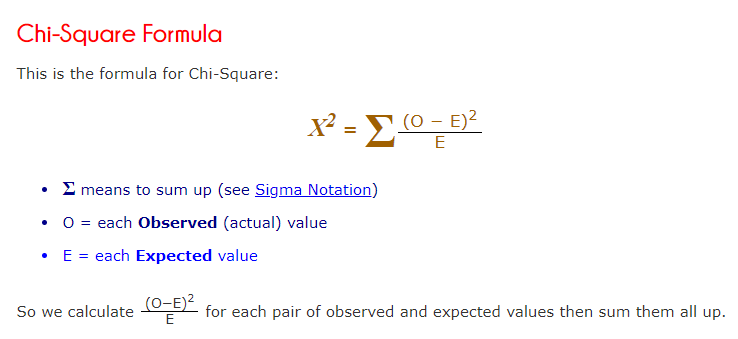

* **Buen ajuste**: Si el valor de significación, es decir, el valor p asociado al estadístico chi-cuadrado, es 0,002, hay pruebas muy sólidas de que se rechaza la hipótesis nula de ausencia de ajuste. Significa buen ajuste.

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


## Prueba de independencia Chi-Sqaured

La independencia es un concepto clave en probabilidad que describe una situación en la que conocer el valor de una variable no dice nada sobre el valor de otra.

Por ejemplo, el mes en que naciste probablemente no te dice nada sobre el navegador que utilizas, por lo que esperaríamos que el mes de nacimiento y la preferencia de navegador fueran independientes.

Por otro lado, tu mes de nacimiento puede estar relacionado con tu rendimiento deportivo en la escuela, por lo que el mes de nacimiento y el rendimiento deportivo pueden no ser independientes.

La prueba chi-cuadrado de independencia comprueba si dos variables categóricas son independientes.

### Efecto del LandContour en SalePrice

In [57]:
# Probemos si conocer LandContour, que es la planitud general de la propiedad, nos dice algo sobre el precio.

# Para ello vamos a dividir el Precio de Venta en tres categorías - Alto, Medio, Bajo
import scipy.stats as sp
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


* El bajo valor p nos indica que las dos variables no son independientes y que conocer el Contorno del terreno de una casa nos dice algo sobre su Precio de venta.

**La distribución de frecuencias lo refleja.**

* Las casas que están cerca de llano/nivel (Lvl) tienen la misma distribución de precio de venta.
* Por otro lado, las casas que están en una ladera, es decir, con una pendiente significativa de lado a lado (HLS) tienen casi el triple de casas con precios bajos que con precios altos.